In [1]:

from collections import Counter
import itertools
import numpy as np
from matplotlib import pyplot

import math


In [2]:

def entropy_from_probabilities(probabilities):
    """Arguments:
            probabilities:  iterable, a probability distribution
       returns:
            HX:  float, the entropy of the passed distribution"""

    # Check we have a valid list of probabilities
    
    probabilities = valid_probabilities(probabilities)

    # Set entropy count to zero
    HX = 0

    # Loop over all probabilities and sum the entropy from each 
    
    for px in probabilities:
        
        HX = HX + px * log2(1.0/px)

    return HX


In [3]:

def strrounddp(num, decimal_p):
    """Arguments:
            num:  the number to round
            decimal_p: integer, the number of decimal places
       returns:
            result, string x rounded to p sig figs. """

    if num == "":
        result = "0." + "0" * decimal_p
    else:
        fmt = "%." + str(decimal_p) + "f"
        result = fmt % round(float(num), decimal_p)

    return result



In [4]:

def log2(posval):
    """Arguments:
            posval:  a postive number
       returns:
            result:  float, base 2 log of posval"""

    result = math.log(posval, 2)

    return result



In [5]:

def valid_probabilities(distribution):
    """Arguments:
            distribution:  a list of probabilities.
       returns:
            probabilities, list of valid probabilities. It removes zero values.

    All values should be positive.  The sum of the
    probabilities should be equal to 1.0 to 2 decimal places. """

    # Check the probabilities sum to 1.00 to 2 decimal places
    
    if round( sum(distribution), 2 ) != 1.0:
        raise ValueError('Probabilities do not sum to 1')

    # Check we have no negative values
    if min(distribution) < 0:
        raise ValueError('Negative probability')

    # Make a list of the probabilities in distribution where
    # the probability is greater than zero
    
    probabilities = [ p for p in distribution if p > 0 ]

    return probabilities



## Calculates entropy of two dice


In [6]:


def main():

    # Create a list holding the possible outcomes for a single dice
    dice = [1, 2, 3, 4, 5, 6]

    # Get the combinations of two dice
    # Use itertools.product which gives the Cartesian product of two lists.
    combinations = itertools.product(dice, dice)

    # Work out the sum of each combination.
    # In words : "Make a list of the sum of each combination for every
    # combination in combinations.
    

    dice_totals = [    sum(combination) for combination in combinations    ]
    print( dice_totals )
    

    # Generate a dict of items and their frequencies
    counterdict = Counter(dice_totals)
    print(  counterdict  )

    # Extract the frequencies & sums
    frequencies     = counterdict.values()
    two_dice_totals = counterdict.keys()

    # Transform the frequencies to probabilities
    # The probability of an event is its frequency divided by the total of all
    # frequencies.  
    # In words : "calculate the probabilty for each frequency in the
    # list of frequencies"

    sum_of_frequencies = sum(frequencies)
    print(sum_of_frequencies)

    probabilities = [freq / float(sum_of_frequencies) for freq in frequencies]
    print( probabilities )

    HX = entropy_from_probabilities(probabilities)
    
    #######################################

    pyplot.figure("Example")
    axes = pyplot.subplot(111)
    width = 0.2                 # Set the bar width
    # Add a blank label to shift the bars right
    print( two_dice_totals )
    two_dice_totals = [" "] + list( two_dice_totals )

    # Create the bars.  Prepend a zero value to the probability list
    # to go with the blank label.
    
    axes.bar(range(len(two_dice_totals)), [0] + probabilities, width=width)

    axes.set_xticks(np.arange(len(two_dice_totals)) + width / 2)
    axes.set_xticklabels(two_dice_totals)

    
    pyplot.title("Entropy = %s bits/pair" % strrounddp(HX, 3),fontsize=20)
    pyplot.xlabel("Outcome value",      fontsize=20)
    pyplot.ylabel("Outcome probability",fontsize=20)


    pyplot.show()




[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]
Counter({7: 6, 6: 5, 8: 5, 5: 4, 9: 4, 4: 3, 10: 3, 3: 2, 11: 2, 2: 1, 12: 1})
36
[0.027777777777777776, 0.05555555555555555, 0.08333333333333333, 0.1111111111111111, 0.1388888888888889, 0.16666666666666666, 0.1388888888888889, 0.1111111111111111, 0.08333333333333333, 0.05555555555555555, 0.027777777777777776]
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


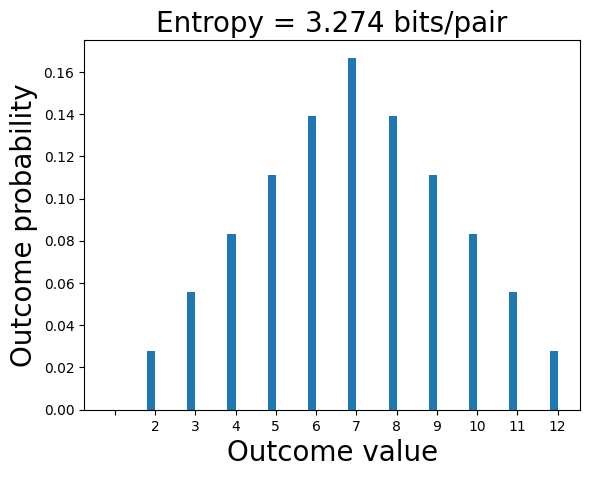

In [7]:


main()

